# Use hh2 dataset to train a maching learning model

In [1]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")

Import Dataset and remove variables where outcome is a nonstarter

In [35]:
hh = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Data_Wrangling/hh4.csv")

<AxesSubplot:>

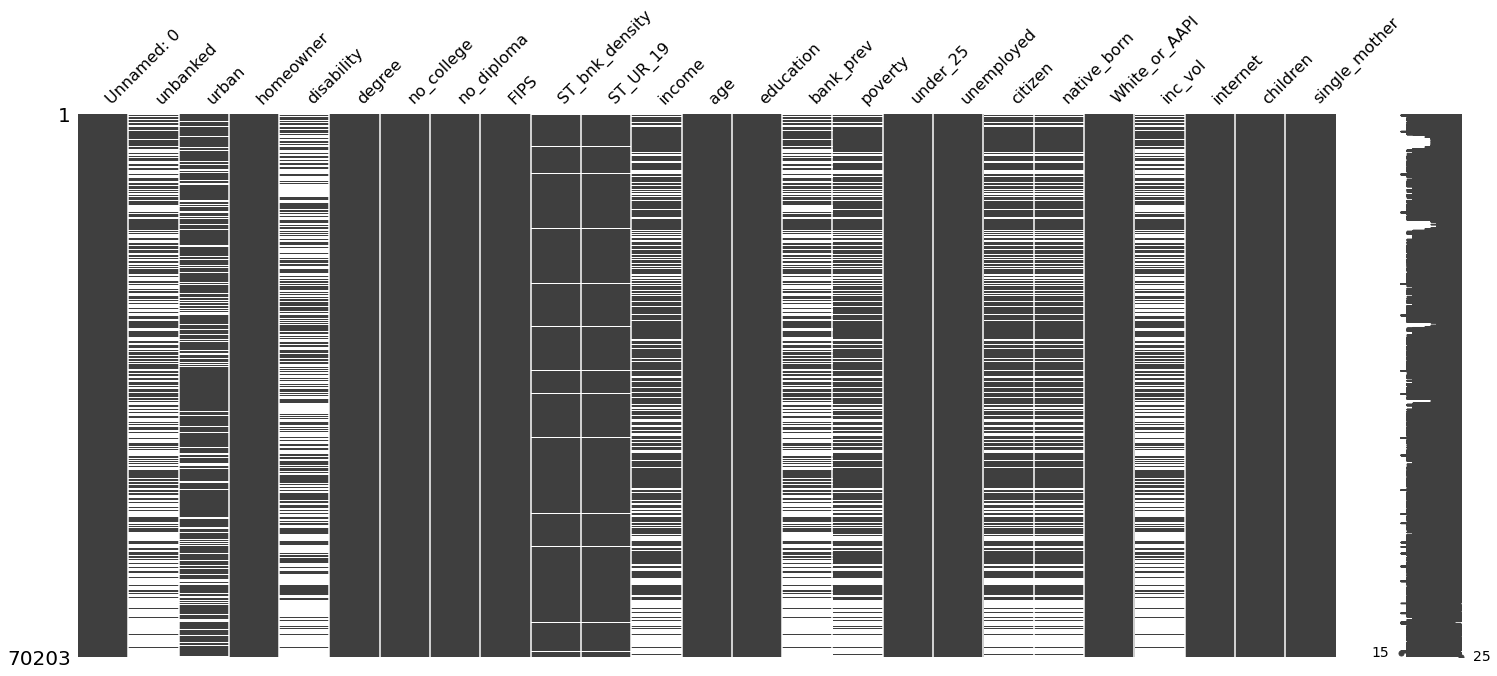

In [36]:
miss.matrix(hh)

In [3]:
hh.shape

(70203, 25)

In [4]:
hh = hh[hh.unbanked >= 0]

In [5]:
hh = hh.dropna()

In [6]:
hh.shape

(17733, 25)

In [7]:
hh_bin = hh[["unbanked","urban","homeowner","disability","degree","no_college","no_diploma","poverty","under_25","unemployed","citizen","native_born","White_or_AAPI","inc_vol","internet","children","single_mother"]]

Split the data by X and Y and prepare training sample

In [8]:
y = hh["unbanked"]
X = hh[["degree","no_college","urban","homeowner","disability","no_diploma","poverty","under_25","unemployed","citizen","native_born","White_or_AAPI","inc_vol","internet","children","single_mother"]]

In [9]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.1,random_state=1999)

In [10]:
# Let's 
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [11]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,degree,no_college,urban,homeowner,disability,no_diploma,poverty,under_25,unemployed,citizen,native_born,White_or_AAPI,inc_vol,internet,children,single_mother
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15954,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15955,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
15956,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
15957,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), ["degree","urban","homeowner","disability","no_college","no_diploma","poverty","under_25","unemployed","citizen","native_born","White_or_AAPI","inc_vol","internet","children","single_mother"])])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5,7,10]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['degree',
                                                                          'urban',
                                                                          'homeowner',
                                                                          'disability',
                                                                          'no_college',
                                                                          'no_diploma',
                                                                          'poverty',
                                                                          'under_25',
                    

In [25]:
search.best_score_

-0.041023479504605165

In [26]:
search.best_params_

{'model': LinearRegression()}

In [27]:
pred_y = search.predict(test_X)

In [28]:
#the best model is a random forest so we need to establish it as a variable
dtree = search.best_estimator_

In [29]:
m.mean_squared_error(test_y,pred_y)

0.04536608280929311

In [30]:
m.r2_score(test_y,pred_y)

0.19251102651950758

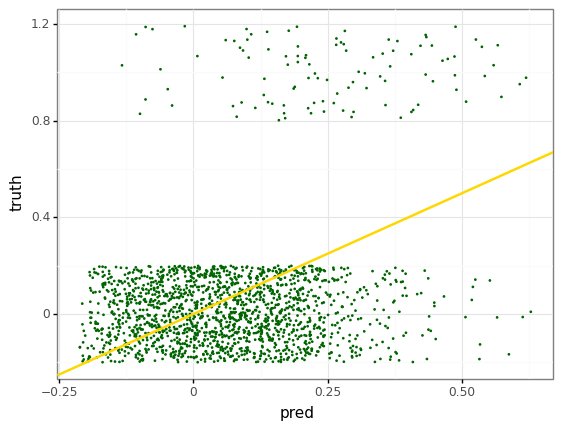

<ggplot: (8770277359192)>

In [19]:
(
    ggplot(pd.DataFrame(dict(pred=pred_y,truth=test_y)),
          aes(x='pred',y="truth")) +
    geom_jitter(color="darkgreen", size=.1, width = 0.2, height = 0.2) +
    geom_abline(color="gold",size=1) +
    theme_bw() 
)

In [20]:
#permute features to determine importances
vi = permutation_importance(dtree,train_X,train_y,n_repeats=25)

In [21]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,poverty,0.081721,0.002229,0.077263,0.086179
1,internet,0.069915,0.002340,0.065235,0.074596
2,homeowner,0.017747,0.001361,0.015025,0.020469
3,no_diploma,0.016932,0.001183,0.014565,0.019298
4,White_or_AAPI,0.013933,0.000933,0.012067,0.015799
5,no_college,0.003456,0.000467,0.002523,0.004389
6,single_mother,0.002218,0.000568,0.001082,0.003354
7,disability,0.002055,0.000489,0.001078,0.003032
8,children,0.001088,0.000324,0.000439,0.001736
9,inc_vol,0.001035,0.000258,0.000519,0.001552


In [22]:
vi_dat.to_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Submission_Content/Fig_Data/Rev_Bin_Sel_Var_Reliance.csv")

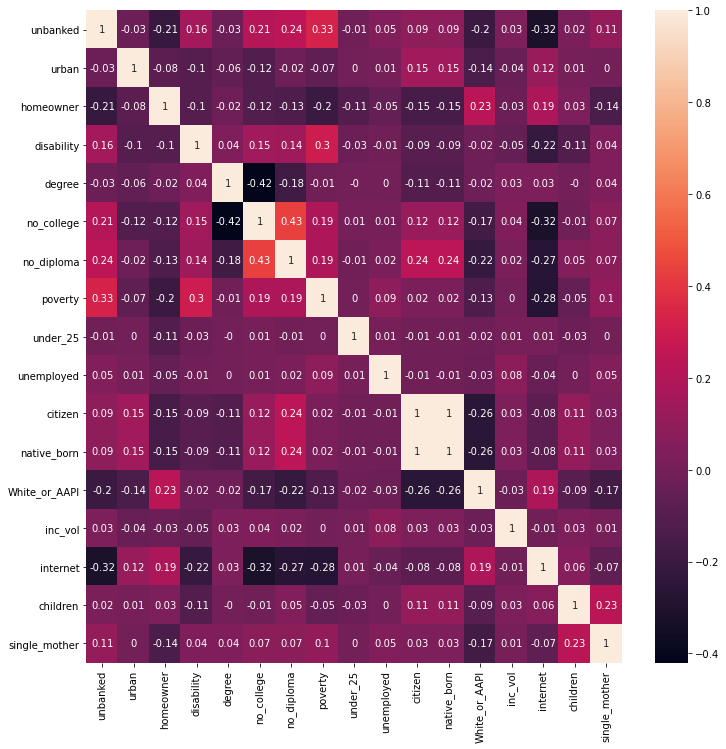

In [23]:
import seaborn as sns 
correlation_mat = hh_bin.corr()
correlation_mat = correlation_mat.round(decimals = 2)
plt.figure(figsize = (12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

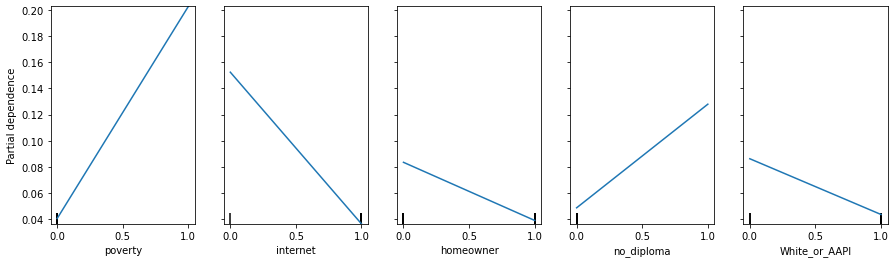

In [32]:
# Target specific features
features = ['poverty','internet','homeowner','no_diploma','White_or_AAPI']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    dtree, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

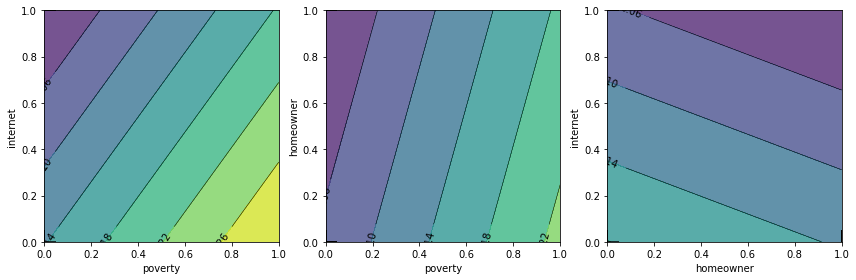

In [33]:


# Feed in the ineraction as a nested list
interacted_features = [['poverty','internet'],['poverty','homeowner'],['homeowner','internet']] 

# Then business as usual when plotting
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    dtree, train_X, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()



<AxesSubplot:>

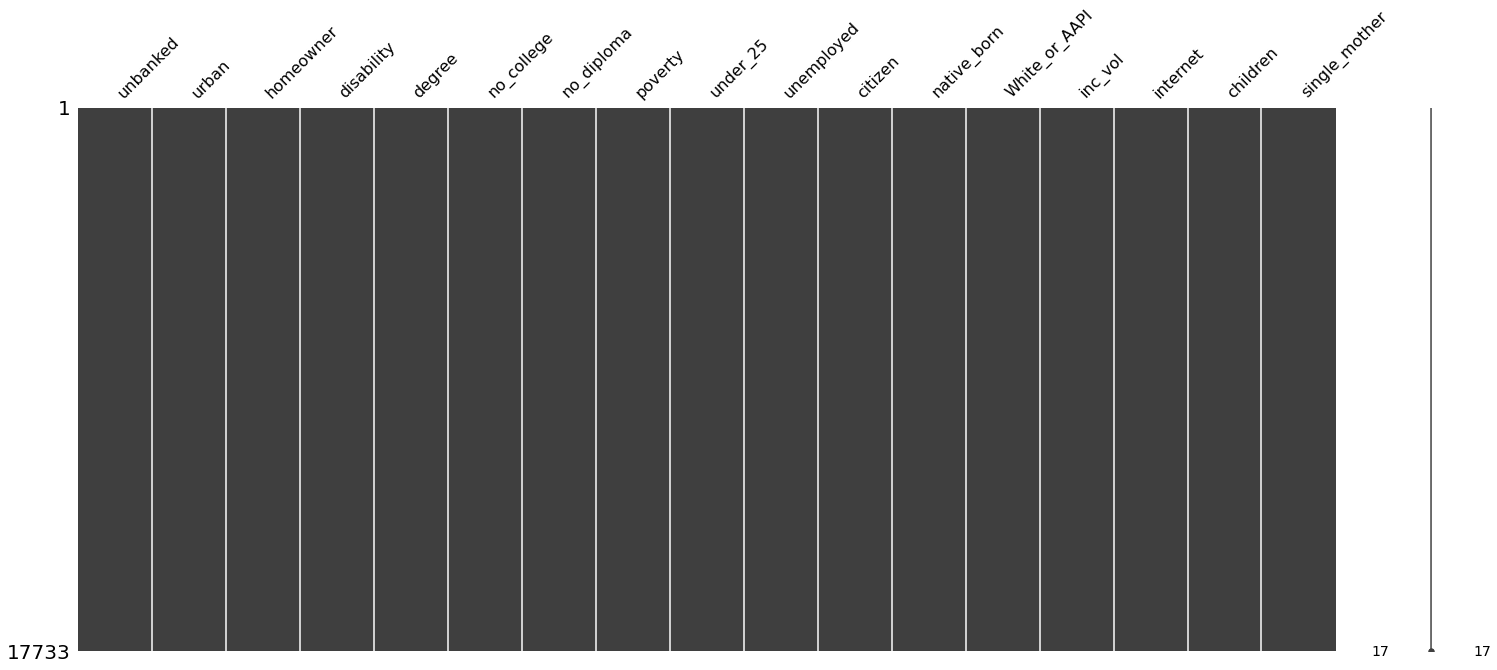